In [1]:
#Library import
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_rel
import scipy.stats as stats
from scipy.stats import normaltest
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score,precision_score,recall_score, plot_roc_curve,plot_confusion_matrix,plot_precision_recall_curve

# Data Import

In [2]:
data= pd.read_csv("CC.csv")

# Exploratory Data Analysis

In [3]:
data.head(10)

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,2,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,3,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,4,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,5,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,6,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,7,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,8,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,9,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,10,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 32 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  284807 non-null  int64  
 1   Time        284807 non-null  float64
 2   V1          284807 non-null  float64
 3   V2          284807 non-null  float64
 4   V3          284807 non-null  float64
 5   V4          284807 non-null  float64
 6   V5          284807 non-null  float64
 7   V6          284807 non-null  float64
 8   V7          284807 non-null  float64
 9   V8          284807 non-null  float64
 10  V9          284807 non-null  float64
 11  V10         284807 non-null  float64
 12  V11         284807 non-null  float64
 13  V12         284807 non-null  float64
 14  V13         284807 non-null  float64
 15  V14         284807 non-null  float64
 16  V15         284807 non-null  float64
 17  V16         284807 non-null  float64
 18  V17         284807 non-null  float64
 19  V1

In [5]:
data.isnull().sum()

Unnamed: 0    0
Time          0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Class         0
dtype: int64

In [6]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Class 0: 284315
Class 1: 492
Proportion: 577.88 : 1


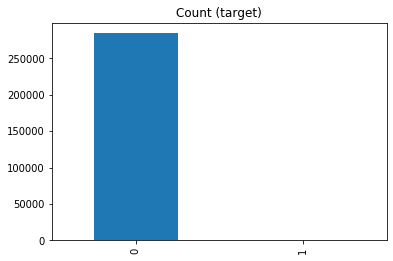

In [7]:
target_count = data.Class.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

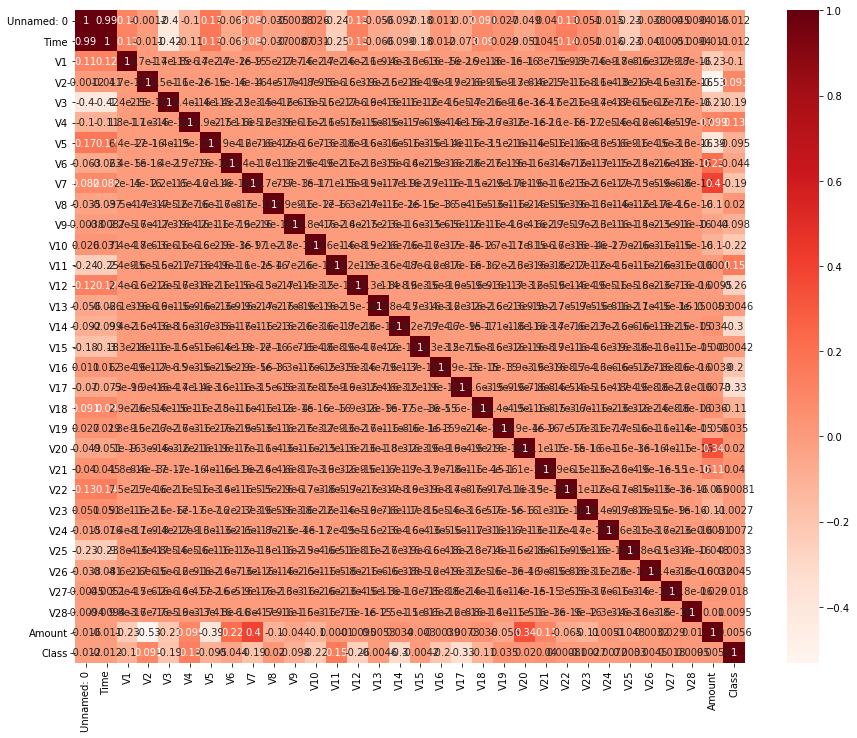

In [8]:
#Using Pearson Correlation
plt.figure(figsize=(15,12))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Data Preprocessing

### Class Balancing

In [9]:
count_class_0, count_class_1 = data.Class.value_counts()

# Divide by class
data_class_0 = data[data['Class'] == 0]
data_class_1 = data[data['Class'] == 1]

Random over-sampling:
1    284315
0    284315
Name: Class, dtype: int64


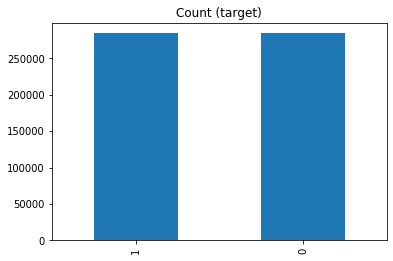

In [10]:
data_class_1_over = data_class_1.sample(count_class_0, replace=True)
data_over = pd.concat([data_class_0, data_class_1_over], axis=0)

print('Random over-sampling:')
print(data_over.Class.value_counts())

data_over.Class.value_counts().plot(kind='bar', title='Count (target)')

### Significance Test

In [11]:
alpha = 0.05

In [12]:
data1=data.sample(n=3000)
data2=data.sample(n=3000)

In [13]:
# Paired T-test

stat, p = ttest_rel(data1, data2)
print(p)
if p.all() > alpha:
    print('Same distributions (fail to reject H0)')
    data=data.sample(n=3000)
else:
    print('Different distributions (reject H0)')

[0.08450847 0.07882823 0.84024534 0.75698807 0.07328559 0.29206554
 0.15913028 0.25389447 0.21153539 0.95502783 0.4172499  0.93129301
 0.82506846 0.25038282 0.93265508 0.71971704 0.50341426 0.16884867
 0.88060727 0.0174643  0.07751042 0.5455251  0.57369057 0.59095515
 0.81622512 0.18720483 0.62029713 0.69148174 0.10113518 0.27965853
 0.50992044 0.59306374]
Same distributions (fail to reject H0)


In [14]:
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(data1, data2)
print(fvalue, pvalue)

[2.99540824e+00 3.11685139e+00 4.08106929e-02 9.34450978e-02
 3.20063295e+00 1.11178170e+00 2.06457249e+00 1.32988319e+00
 1.61587857e+00 3.18552422e-03 6.67156249e-01 7.39675322e-03
 4.87364910e-02 1.30728115e+00 7.19084818e-03 1.24372986e-01
 4.36772636e-01 1.81277935e+00 2.22645969e-02 5.74827854e+00
 3.03522461e+00 3.82341478e-01 3.11003198e-01 2.92771899e-01
 5.30482165e-02 1.73393359e+00 2.49216590e-01 1.56777764e-01
 2.65679230e+00 1.16202076e+00 4.28059296e-01 3.14541927e-01] [0.08355229 0.07753725 0.83991062 0.75985289 0.07366022 0.29173745
 0.15080936 0.24887195 0.20371672 0.95499282 0.41407727 0.93146581
 0.82528416 0.25293314 0.93242412 0.72435158 0.50870968 0.17822606
 0.88139037 0.01653521 0.08152653 0.53637625 0.57708605 0.58846978
 0.81784943 0.18795963 0.61764555 0.69215473 0.10316099 0.2810902
 0.51296785 0.57492731]


### Feature Selection

In [15]:
x = data_over.drop("Class", axis=1)
y = data_over["Class"]

In [16]:
cols = list(x.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, n_features_to_select=15)

C:\Users\SHILPA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [17]:
#Transforming data using RFE
X_rfe = rfe.fit_transform(x,y)

In [18]:
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['V1', 'V4', 'V7', 'V8', 'V10', 'V13', 'V14', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V26', 'V28'],
      dtype='object')


# Data Preparation

In [19]:
X=x[selected_features_rfe]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568630 entries, 0 to 79883
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568630 non-null  float64
 1   V4      568630 non-null  float64
 2   V7      568630 non-null  float64
 3   V8      568630 non-null  float64
 4   V10     568630 non-null  float64
 5   V13     568630 non-null  float64
 6   V14     568630 non-null  float64
 7   V18     568630 non-null  float64
 8   V19     568630 non-null  float64
 9   V20     568630 non-null  float64
 10  V21     568630 non-null  float64
 11  V22     568630 non-null  float64
 12  V23     568630 non-null  float64
 13  V26     568630 non-null  float64
 14  V28     568630 non-null  float64
dtypes: float64(15)
memory usage: 69.4 MB


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
score= pd.DataFrame()

# Boosting techniques

## CATBoost

In [22]:
cat = CatBoostClassifier(iterations=10, learning_rate=0.5)

In [23]:
cat.fit(X_train, y_train)

0:	learn: 0.3796419	total: 138ms	remaining: 1.24s
1:	learn: 0.2581502	total: 203ms	remaining: 813ms
2:	learn: 0.1921646	total: 281ms	remaining: 655ms
3:	learn: 0.1524853	total: 352ms	remaining: 528ms
4:	learn: 0.1273660	total: 417ms	remaining: 417ms
5:	learn: 0.1062463	total: 478ms	remaining: 318ms
6:	learn: 0.0939028	total: 535ms	remaining: 229ms
7:	learn: 0.0846064	total: 600ms	remaining: 150ms
8:	learn: 0.0786251	total: 657ms	remaining: 73ms
9:	learn: 0.0695802	total: 747ms	remaining: 0us


In [24]:
cat.predict_proba(data=X_test)

array([[0.01189356, 0.98810644],
       [0.01189356, 0.98810644],
       [0.00826843, 0.99173157],
       ...,
       [0.98174047, 0.01825953],
       [0.94120935, 0.05879065],
       [0.00518671, 0.99481329]])

In [25]:
predcat= cat.predict(data=X_test)
predcat

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [26]:
acc= accuracy_score(y_test,predcat)*100
acc

98.15345655347062

In [27]:
f1= f1_score(y_test,predcat)*100
f1

98.1528718444894

In [28]:
prec= precision_score(y_test,predcat)*100
prec

98.44381318700708

In [29]:
rec= recall_score(y_test,predcat)*100
rec

97.86364513356602

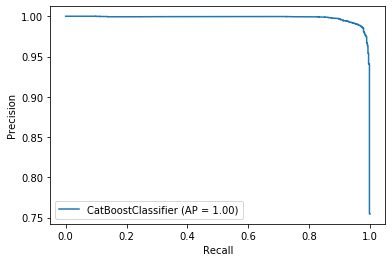

In [30]:
plot_precision_recall_curve(cat,X_test,y_test)

[[55831   882]
 [ 1218 55795]]


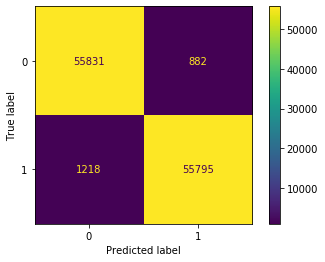

In [31]:
print(confusion_matrix(y_test,predcat))
plot_confusion_matrix(cat,X_test,y_test)

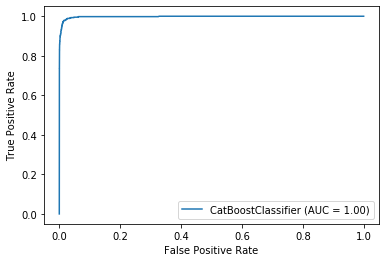

In [32]:
plot_roc_curve(cat,X_test,y_test)

In [33]:
score= score.append([['CatBoost', acc, f1, prec, rec]])
score

,0,1,2,3,4
0,CatBoost,98.153457,98.152872,98.443813,97.863645


## Gradient Boost

In [34]:
gbc = GradientBoostingClassifier(random_state=0,min_weight_fraction_leaf=0.5)

In [35]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(min_weight_fraction_leaf=0.5, random_state=0)

In [36]:
gbc.predict_proba(X_test)

array([[0.15937022, 0.84062978],
       [0.21558155, 0.78441845],
       [0.06545818, 0.93454182],
       ...,
       [0.82957402, 0.17042598],
       [0.96391447, 0.03608553],
       [0.04475818, 0.95524182]])

In [37]:
predgbc= gbc.predict(X_test)
predgbc

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [38]:
acc= accuracy_score(y_test,predgbc)*100
acc

90.1086822714243

In [39]:
f1= f1_score(y_test,predgbc)*100
f1

90.0240331320226

In [40]:
prec= precision_score(y_test,predgbc)*100
prec

91.04541866972806

In [41]:
rec= recall_score(y_test,predgbc)*100
rec

89.02531001701365

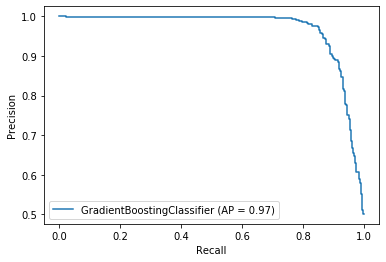

In [42]:
plot_precision_recall_curve(gbc,X_test,y_test)

[[51721  4992]
 [ 6257 50756]]


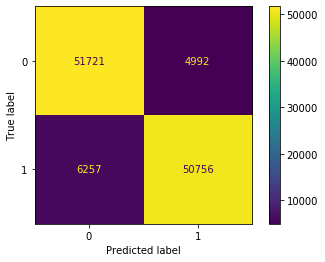

In [43]:
print(confusion_matrix(y_test,predgbc))
plot_confusion_matrix(gbc,X_test,y_test)

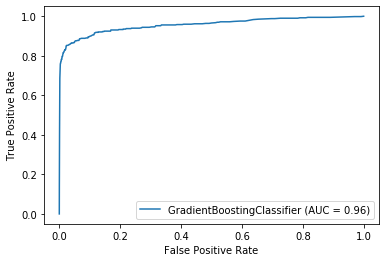

In [44]:
plot_roc_curve(gbc,X_test,y_test)

In [45]:
score= score.append([['Gradient Boost', acc, f1, prec, rec]])
score

,0,1,2,3,4
0,CatBoost,98.153457,98.152872,98.443813,97.863645
0,Gradient Boost,90.108682,90.024033,91.045419,89.025310


## XG Boost

In [46]:
xgb = XGBClassifier(n_estimators=20)

In [47]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [48]:
xgb.predict_proba(X_test)

array([[0.00275767, 0.99724233],
       [0.00307685, 0.99692315],
       [0.00119197, 0.998808  ],
       ...,
       [0.99794966, 0.00205036],
       [0.99571717, 0.00428285],
       [0.00120723, 0.99879277]], dtype=float32)

In [49]:
predxgb= xgb.predict(X_test)
predxgb

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [50]:
acc= accuracy_score(y_test,predxgb)*100
acc

99.87250057154917

In [51]:
f1= f1_score(y_test,predxgb)*100
f1

99.87299752126196

In [52]:
prec= precision_score(y_test,predxgb)*100
prec

99.74631722593513

In [53]:
rec= recall_score(y_test,predxgb)*100
rec

100.0

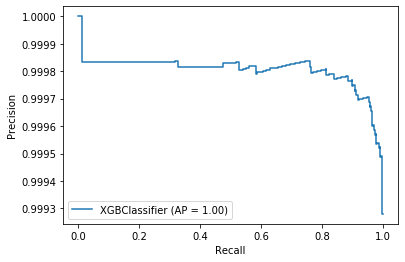

In [54]:
plot_precision_recall_curve(xgb,X_test,y_test)

[[56568   145]
 [    0 57013]]


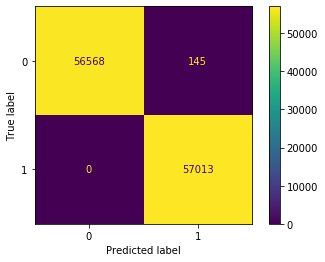

In [55]:
print(confusion_matrix(y_test,predxgb))
plot_confusion_matrix(xgb,X_test,y_test)

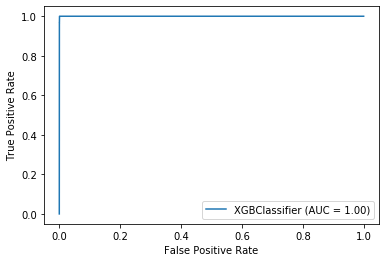

In [56]:
plot_roc_curve(xgb,X_test,y_test)

In [57]:
score= score.append([['XGBoost', acc, f1, prec, rec]])
score

,0,1,2,3,4
0,CatBoost,98.153457,98.152872,98.443813,97.863645
0,Gradient Boost,90.108682,90.024033,91.045419,89.025310
0,XGBoost,99.872501,99.872998,99.746317,100.000000


## ADABoost

In [58]:
abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=54,min_weight_fraction_leaf=0.5), algorithm="SAMME", n_estimators=20)

In [59]:
abc.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=54,
                                                         min_weight_fraction_leaf=0.5),
                   n_estimators=20)

In [60]:
abc.predict_proba(X_test)

array([[0.26960702, 0.73039298],
       [0.26960702, 0.73039298],
       [0.26960702, 0.73039298],
       ...,
       [0.73105858, 0.26894142],
       [0.73105858, 0.26894142],
       [0.26960702, 0.73039298]])

In [61]:
predabc= abc.predict(X_test)
predabc

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [62]:
acc= accuracy_score(y_test,predabc)*100
acc

90.34609500026379

In [63]:
f1= f1_score(y_test,predabc)*100
f1

90.37242298552225

In [64]:
prec= precision_score(y_test,predabc)*100
prec

90.36370650953984

In [65]:
rec= recall_score(y_test,predabc)*100
rec

90.38114114324803

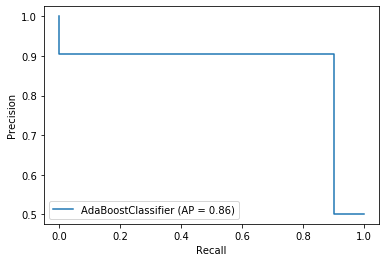

In [66]:
plot_precision_recall_curve(abc,X_test,y_test)

[[51218  5495]
 [ 5484 51529]]


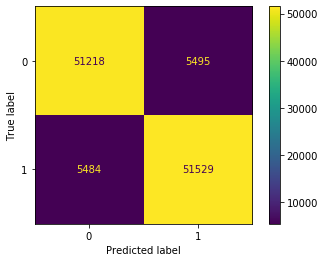

In [67]:
print(confusion_matrix(y_test,predabc))
plot_confusion_matrix(abc,X_test,y_test)

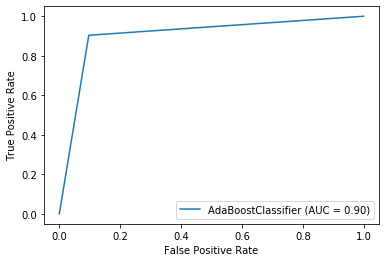

In [68]:
plot_roc_curve(abc,X_test,y_test)

In [69]:
score= score.append([['ADABoost', acc, f1, prec, rec]])
score

,0,1,2,3,4
0,CatBoost,98.153457,98.152872,98.443813,97.863645
0,Gradient Boost,90.108682,90.024033,91.045419,89.025310
0,XGBoost,99.872501,99.872998,99.746317,100.000000
0,ADABoost,90.346095,90.372423,90.363707,90.381141


# Bagging techniques

## Extra Tree Classifier

In [70]:
etc = ExtraTreesClassifier(n_estimators=100, random_state=50,min_weight_fraction_leaf=0.1)

In [71]:
etc.fit(X_train, y_train)

ExtraTreesClassifier(min_weight_fraction_leaf=0.1, random_state=50)

In [72]:
etc.predict_proba(X_test)

array([[0.52752778, 0.47247222],
       [0.52711158, 0.47288842],
       [0.42607441, 0.57392559],
       ...,
       [0.54530011, 0.45469989],
       [0.56070589, 0.43929411],
       [0.36028546, 0.63971454]])

In [73]:
predetc= etc.predict(X_test)
predetc

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [74]:
acc= accuracy_score(y_test,predetc)*100
acc

89.63825334576086

In [75]:
f1= f1_score(y_test,predetc)*100
f1

88.48454051518586

In [76]:
prec= precision_score(y_test,predetc)*100
prec

99.9007038990269

In [77]:
rec= recall_score(y_test,predetc)*100
rec

79.40995913212777

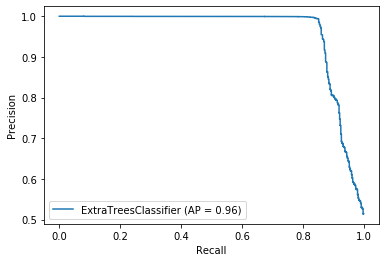

In [78]:
plot_precision_recall_curve(etc,X_test,y_test)

[[56668    45]
 [11739 45274]]


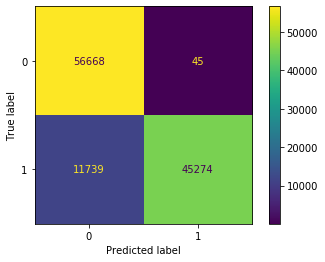

In [79]:
print(confusion_matrix(y_test,predetc))
plot_confusion_matrix(etc,X_test,y_test)

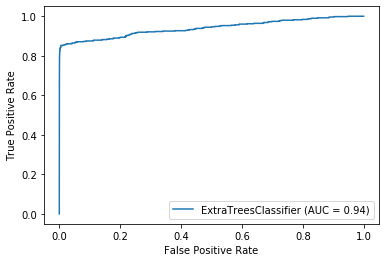

In [80]:
plot_roc_curve(etc,X_test,y_test)

In [81]:
score= score.append([['ExtraTree', acc, f1, prec, rec]])
score

,0,1,2,3,4
0,CatBoost,98.153457,98.152872,98.443813,97.863645
0,Gradient Boost,90.108682,90.024033,91.045419,89.025310
0,XGBoost,99.872501,99.872998,99.746317,100.000000
0,ADABoost,90.346095,90.372423,90.363707,90.381141
0,ExtraTree,89.638253,88.484541,99.900704,79.409959


## Random Forest Trees

In [82]:
rft = RandomForestClassifier(max_depth=25, random_state=40,min_weight_fraction_leaf=0.3)

In [83]:
rft.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, min_weight_fraction_leaf=0.3,
                       random_state=40)

In [84]:
rft.predict_proba(X_test)

array([[0.29452167, 0.70547833],
       [0.29452167, 0.70547833],
       [0.16605307, 0.83394693],
       ...,
       [0.67079181, 0.32920819],
       [0.70403279, 0.29596721],
       [0.08532669, 0.91467331]])

In [85]:
predrft= rft.predict(X_test)
predrft

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [86]:
acc= accuracy_score(y_test,predrft)*100
acc

93.4535638288518

In [87]:
f1= f1_score(y_test,predrft)*100
f1

93.09298722504151

In [88]:
prec= precision_score(y_test,predrft)*100
prec

98.8104616354183

In [89]:
rec= recall_score(y_test,predrft)*100
rec

88.0009822321225

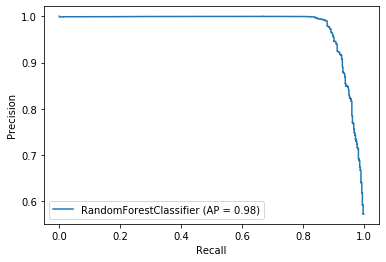

In [90]:
plot_precision_recall_curve(rft,X_test,y_test)

[[56109   604]
 [ 6841 50172]]


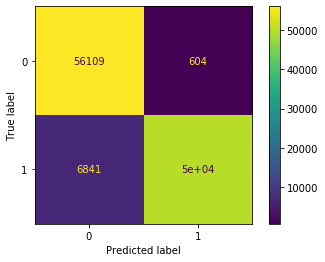

In [91]:
print(confusion_matrix(y_test,predrft))
plot_confusion_matrix(rft,X_test,y_test)

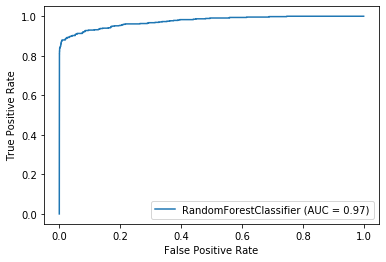

In [92]:
plot_roc_curve(rft,X_test,y_test)

In [93]:
score= score.append([['Random Forest', acc, f1, prec, rec]])
score

,0,1,2,3,4
0,CatBoost,98.153457,98.152872,98.443813,97.863645
0,Gradient Boost,90.108682,90.024033,91.045419,89.025310
0,XGBoost,99.872501,99.872998,99.746317,100.000000
0,ADABoost,90.346095,90.372423,90.363707,90.381141
0,ExtraTree,89.638253,88.484541,99.900704,79.409959
0,Random Forest,93.453564,93.092987,98.810462,88.000982


## Decision tree

In [94]:
dt = DecisionTreeClassifier(random_state=42,min_weight_fraction_leaf=0.4)

In [95]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(min_weight_fraction_leaf=0.4, random_state=42)

In [96]:
dt.predict_proba(X_test)

array([[0.03232932, 0.96767068],
       [0.03232932, 0.96767068],
       [0.03232932, 0.96767068],
       ...,
       [0.88292028, 0.11707972],
       [0.88292028, 0.11707972],
       [0.03232932, 0.96767068]])

In [97]:
preddt= dt.predict(X_test)
preddt

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [98]:
acc= accuracy_score(y_test,preddt)*100
acc

92.08712167842006

In [99]:
f1= f1_score(y_test,preddt)*100
f1

91.69458519072275

In [100]:
prec= precision_score(y_test,preddt)*100
prec

96.76263196852234

In [101]:
rec= recall_score(y_test,preddt)*100
rec

87.13100520933821

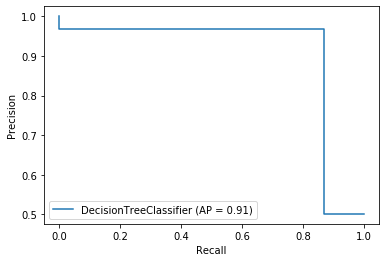

In [102]:
plot_precision_recall_curve(dt,X_test,y_test)

[[55051  1662]
 [ 7337 49676]]


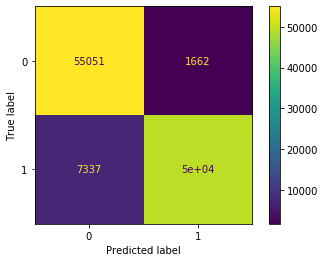

In [103]:
print(confusion_matrix(y_test,preddt))
plot_confusion_matrix(dt,X_test,y_test)

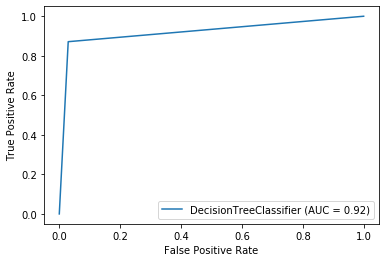

In [104]:
plot_roc_curve(dt,X_test,y_test)

In [105]:
score= score.append([['Decision tree', acc, f1, prec, rec]])
score

,0,1,2,3,4
0,CatBoost,98.153457,98.152872,98.443813,97.863645
0,Gradient Boost,90.108682,90.024033,91.045419,89.025310
0,XGBoost,99.872501,99.872998,99.746317,100.000000
0,ADABoost,90.346095,90.372423,90.363707,90.381141
0,ExtraTree,89.638253,88.484541,99.900704,79.409959
0,Random Forest,93.453564,93.092987,98.810462,88.000982
0,Decision tree,92.087122,91.694585,96.762632,87.131005


# Comparitive Analysis

In [106]:
score.columns=['Model', 'Accuracy', 'F1-Score','Precision','Recall']
score

,Model,Accuracy,F1-Score,Precision,Recall
0,CatBoost,98.153457,98.152872,98.443813,97.863645
0,Gradient Boost,90.108682,90.024033,91.045419,89.025310
0,XGBoost,99.872501,99.872998,99.746317,100.000000
0,ADABoost,90.346095,90.372423,90.363707,90.381141
0,ExtraTree,89.638253,88.484541,99.900704,79.409959
0,Random Forest,93.453564,93.092987,98.810462,88.000982
0,Decision tree,92.087122,91.694585,96.762632,87.131005


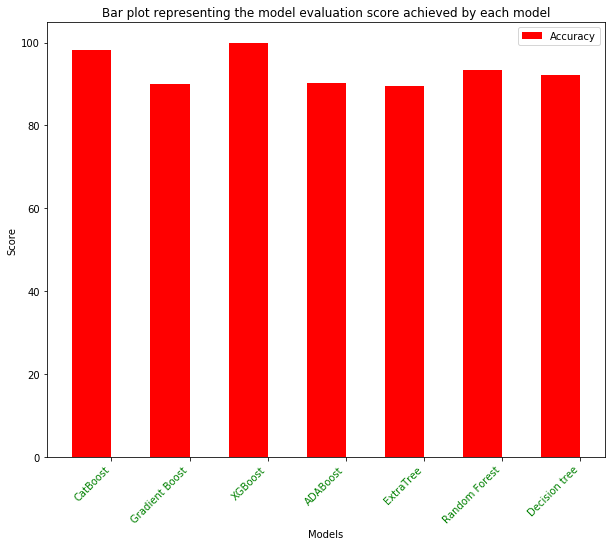

In [107]:
fig = plt.figure(figsize = (10, 8))   
# creating the bar plot 
X = np.arange(7)
plt.bar(X, score['Accuracy'], color = 'red', width = 0.5, label='Accuracy')
plt.xticks([i + 0.25 for i in range(7)], score['Model'].to_list(),color = 'green',rotation = 45, horizontalalignment = 'right')
plt.title("Bar plot representing the model evaluation score achieved by each model")
plt.xlabel('Models')
plt.ylabel('Score')
plt.legend()

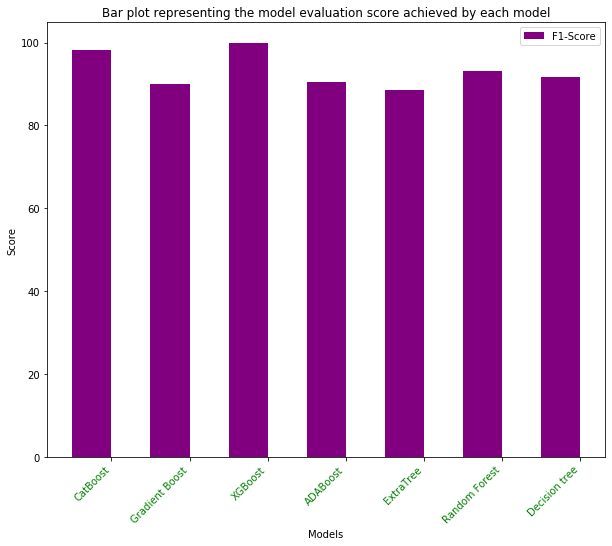

In [108]:
fig = plt.figure(figsize = (10, 8))   
# creating the bar plot 
X = np.arange(7)
plt.bar(X, score['F1-Score'], color = 'purple', width = 0.5, label='F1-Score')
plt.xticks([i + 0.25 for i in range(7)], score['Model'].to_list(),color = 'green',rotation = 45, horizontalalignment = 'right')
plt.title("Bar plot representing the model evaluation score achieved by each model")
plt.xlabel('Models')
plt.ylabel('Score')
plt.legend()

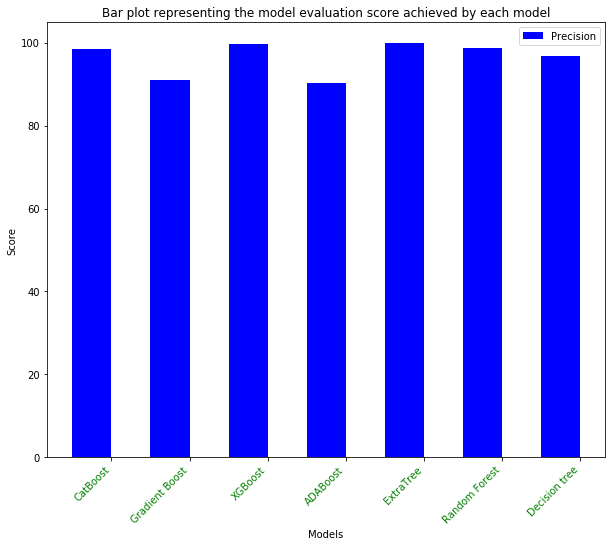

In [109]:
fig = plt.figure(figsize = (10, 8))   
# creating the bar plot 
X = np.arange(7)
plt.bar(X, score['Precision'], color = 'blue', width = 0.5, label='Precision')
plt.xticks([i + 0.25 for i in range(7)], score['Model'].to_list(),color = 'green',rotation = 45, horizontalalignment = 'right')
plt.title("Bar plot representing the model evaluation score achieved by each model")
plt.xlabel('Models')
plt.ylabel('Score')
plt.legend()

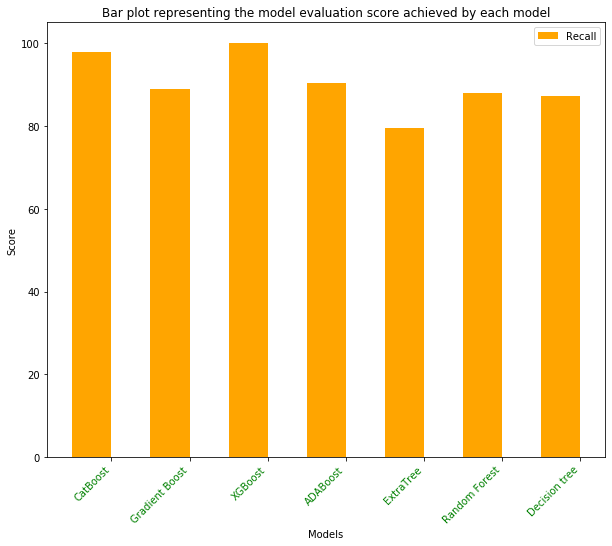

In [110]:
fig = plt.figure(figsize = (10, 8))   
# creating the bar plot 
X = np.arange(7)
plt.bar(X, score['Recall'], color = 'orange', width = 0.5, label='Recall')
plt.xticks([i + 0.25 for i in range(7)], score['Model'].to_list(),color = 'green',rotation = 45, horizontalalignment = 'right')
plt.title("Bar plot representing the model evaluation score achieved by each model")
plt.xlabel('Models')
plt.ylabel('Score')
plt.legend()

In [111]:
result= pd.DataFrame()
result['Actual']=y_test
result['CatBoost']=predcat
result['GradientBoost']=predgbc
result['XGBoost']=predxgb
result['AdaBoost']=predabc
result['ExtraTrees']=predetc
result['RandomForest']=predrft
result['DecisionTree']=preddt
result.head(50)

,Actual,CatBoost,GradientBoost,XGBoost,AdaBoost,ExtraTrees,RandomForest,DecisionTree
105178,1,1,1,1,1,0,1,1
123270,1,1,1,1,1,0,1,1
156988,1,1,1,1,1,1,1,1
89432,0,0,0,0,0,0,0,0
247673,1,1,1,1,1,0,1,0
57686,0,0,0,0,0,0,0,0
42856,1,1,1,1,1,1,1,1
281362,0,0,0,0,0,0,0,0
190368,1,1,1,1,1,1,1,1
27738,1,1,1,1,1,1,1,1
